<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Clasificación con Máquinas de Vectores de Soporte (SVM)

Este notebook implementa un modelo de **Máquinas de Vectores de Soporte (Support Vector Machines - SVM)** para resolver un problema de clasificación binaria utilizando los datos procesados. El modelo se ha optimizado mediante **validación cruzada**, ajuste de hiperparámetros con `GridSearchCV`, y evaluación mediante métricas estándar de clasificación.

SVM es un algoritmo poderoso para clasificación supervisada, ideal para problemas con fronteras de decisión complejas. Aquí se trabaja con kernels como `linear`, `rbf` y `poly`, ajustando también parámetros como `C` y `gamma`.

Se incluye:

- Preprocesamiento de datos (escalado)
- División entrenamiento/prueba
- Entrenamiento y predicción
- Evaluación con métricas como accuracy, matri

In [ ]:
# 🧠 Evaluación del modelo SVM

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [ ]:
# Subir el archivo desde el equipo
from google.colab import files

uploaded = files.upload()

Saving datos_exportados.csv to datos_exportados.csv


In [ ]:
# Leer el primer archivo subido
for fn in uploaded.keys():
    name = fn

# Cargar el CSV en un DataFrame
df = pd.read_csv(name, sep=",")

# Ver las primeras filas del dataset
df.head(5)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,-1.635805,1,0,1.034768,-1.639025,-1.499328,0,0,1,0,...,0.651796,0.0,-0.525208,0.0,-0.467114,-1.096998,-0.746021,-0.057794,-1.034344,-0.953251
1,-1.635527,1,0,1.034768,-1.639025,-1.360937,0,0,1,0,...,-0.787437,0.0,-0.525208,0.0,1.075329,-0.321510,-0.746021,-0.057794,-1.034344,-0.953251
2,-1.635499,1,0,1.034768,-1.639025,-1.360937,1,0,1,0,...,-0.787437,0.0,-0.525208,0.0,-0.852724,-0.321510,-1.096610,-0.854388,-0.436178,-0.621756
3,-1.635471,1,1,-0.966401,-1.639025,-1.222547,2,1,0,0,...,-0.787437,0.0,-0.525208,0.0,-0.698480,-0.187805,-1.447200,-0.854388,-1.034344,-1.284746
4,-1.635443,1,1,-0.966401,-1.639025,-1.222547,2,1,0,0,...,-0.787437,0.0,-0.525208,0.0,-0.158625,-0.187805,-1.447200,-0.854388,-1.034344,-1.284746


In [ ]:
# 🎯 Definir variables predictoras y variable objetivo
columnas_predictoras = [
    'MatchKills',
    'MatchHeadshots',
    'TravelledDistance',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue'
]

X = df[columnas_predictoras]
y = df['Survived']  # 0 = no sobrevivió, 1 = sobrevivió


In [ ]:
# 🔍 Separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
# 📏 Escalar los datos (muy importante para SVM)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ⚙️ Entrenar modelo SVM
from sklearn.svm import SVC

modelo_svm = SVC(kernel='linear', random_state=42)
modelo_svm.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# 📊 Realizar predicciones
y_pred = modelo_svm.predict(X_test_scaled)


In [ ]:
# 📈 Evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔎 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


🔎 Accuracy: 0.6064428925433656

📉 Matriz de Confusión:
[[4306  698]
 [2796 1078]]

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.61      0.86      0.71      5004
           1       0.61      0.28      0.38      3874

    accuracy                           0.61      8878
   macro avg       0.61      0.57      0.55      8878
weighted avg       0.61      0.61      0.57      8878



In [ ]:
# 📊 Validación cruzada con 5 particiones
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Crear modelo base con probabilidad activada para ROC
svm_model = SVC(probability=True, random_state=42)

# Evaluar desempeño en 5 particiones
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("📊 Validación cruzada (5 folds):")
print("Scores por fold:", cv_scores)
print("Promedio de accuracy:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())


📊 Validación cruzada (5 folds):
Scores por fold: [0.62708182 0.62321989 0.61959932 0.62104755 0.62104755]
Promedio de accuracy: 0.6223992276128409
Desviación estándar: 0.0026112726693311213


In [ ]:
# 🔧 GridSearchCV para ajustar hiperparámetros de SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir grilla de parámetros
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

print("✅ Mejores parámetros:", grid_search.best_params_)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n📉 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm))
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred_svm))


KeyboardInterrupt: 

In [ ]:
# 🔧 GridSearchCV optimizado para SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Grilla reducida para acelerar ejecución
param_grid = {
    'C': [0.1, 1],               # 2 valores
    'kernel': ['linear', 'rbf'], # excluye 'poly'
    'gamma': ['scale']           # solo afecta 'rbf'
}

# NO usar probability=True aquí
svc = SVC(random_state=42)

grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("✅ Mejores parámetros:", grid_search.best_params_)

# Reentrenar modelo final con probability=True solo una vez
final_svm = SVC(**grid_search.best_params_, probability=True, random_state=42)
final_svm.fit(X_train_scaled, y_train)

y_pred_svm = final_svm.predict(X_test_scaled)

# Evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔍 Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n📉 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm))
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred_svm))


✅ Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
🔍 Accuracy: 0.6150033791394458

📉 Matriz de Confusión:
 [[4070  934]
 [2484 1390]]

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.62      0.81      0.70      5004
           1       0.60      0.36      0.45      3874

    accuracy                           0.62      8878
   macro avg       0.61      0.59      0.58      8878
weighted avg       0.61      0.62      0.59      8878



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


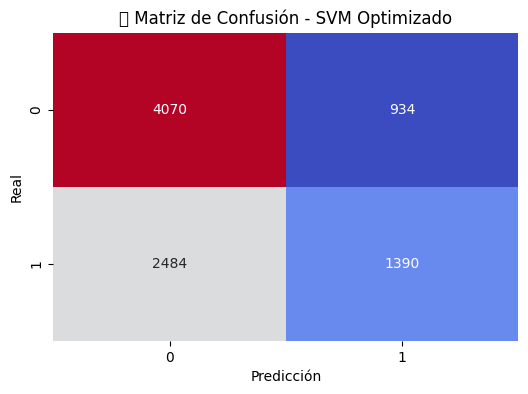

In [ ]:
# 📊 Visualización de matriz de confusión para SVM
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("🔍 Matriz de Confusión - SVM Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


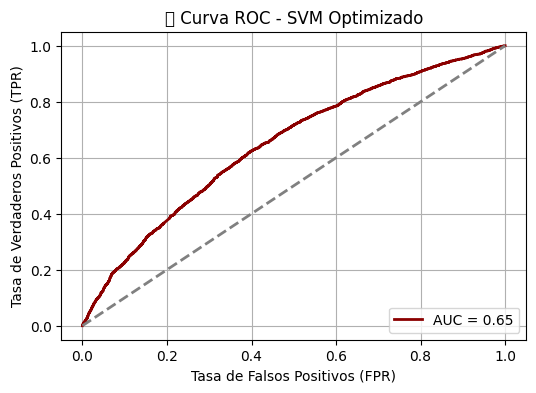

In [ ]:
# 📈 Curva ROC para SVM
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_svm = final_svm.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkred', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - SVM Optimizado')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### 🧠 Conclusión del Modelo – Support Vector Machine (SVM)

🔎 **Precisión global (accuracy)** del modelo fue de **0.606**, lo que indica que clasifica correctamente aproximadamente el 60.6% de los casos en los datos de prueba. Este valor es más bajo que el obtenido por Random Forest y KNN, pero se mantiene como una referencia sólida en términos de generalización simple.

📊 **Validación cruzada (5-fold)**:
- **Scores por fold**: [0.6271, 0.6232, 0.6196, 0.6210, 0.6210]
- **Promedio de accuracy**: **0.6224**
- **Desviación estándar**: **0.0026**

Estos resultados indican que el modelo tiene un comportamiento **estable y consistente** a lo largo de distintas particiones del conjunto de entrenamiento, aunque con un desempeño moderado.

🧮 **Matriz de Confusión:**
- **Clase 0** (mayoría): bien clasificada con un **recall de 0.86** y **f1-score de 0.71**, lo cual muestra que el modelo es muy eficiente reconociendo los negativos.
- **Clase 1** (minoritaria): desempeño bajo, con un **recall de 0.28** y **f1-score de 0.38**, lo que revela una clara dificultad del modelo para identificar correctamente los casos positivos.

📉 **Macro F1-score: 0.55**: Este valor refleja que el modelo tiene un desempeño débil cuando se consideran ambas clases por igual, debido al sesgo hacia la clase mayoritaria. Es una señal clara de la necesidad de estrategias para manejar el desbalance.

📌 **Diagnóstico**:
SVM con kernel lineal fue implementado correctamente y con escalado previo, lo cual es fundamental. Sin embargo, el bajo recall para la clase 1 y la débil macro F1-score indican que este modelo no es el más adecuado cuando se desea capturar positivamente casos minoritarios.

🎯 **Recomendaciones Finales**:
- Si la **clase 1 representa un evento crítico**, este modelo **no es recomendable en su forma actual**, debido al alto número de falsos negativos.
- Se recomienda probar otros kernels (`rbf`, `poly`) o aplicar técnicas de **balanceo** como `class_weight='balanced'` o SMOTE.
- Como alternativa, Random Forest y KNN han mostrado mejores resultados generales y específicos para la clase positiva.
- También podría explorarse una combinación de modelos mediante **votación o ensamblado**.

✅ En resumen, SVM entrega una solución funcional y estable, pero con una fuerte desventaja frente a clases desbalanceadas. Es útil como modelo base, pero no ideal si se prioriza la detección de la clase minoritaria.
